In [1]:
import sys
sys.path.append('..')
import scipy
from HSFNets import *
from utils import *


Simulation:

1) Implement Dynamical System of Choice

2) Implement Classic Deneve Equations

3) Implement d-dimension new equations

4) Run simulation to compare the 3

In [2]:
# Simulate Classic Deneve Net 

def run_sim(lam, N):

    A =  -np.eye(2)

    #A =  2 * np. pi * A
    #N = 32
    #lam =  1
    mode = '2d cosine'
    p = .9

    D = gen_decoder(A.shape[0], N, mode=mode)
    D = gen_decoder(A.shape[0], N)
    B = np.eye(2)
    u0 = D[:,0]
    x0 = np.asarray([.5, .5])
    T = 3
    dt = 1e-3

    lam_v = 1


    sin_func = lambda t :   np.asarray([np.sin(2*np.pi*t), np.cos(2*np.pi*t)]) + .5

    lds = sat.LinearDynamicalSystem(x0, A, B, u = sin_func , T = T, dt = dt)




    gj_net = GapJunctionDeneveNet(T=T, dt=dt, N=N, D=D, lds=lds, lam=lam, t0=0)
    classic_net = ClassicDeneveNet(T=T, dt=dt, N=N, D=D, lds=lds, lam=lam, lam_v=lam_v, t0=0)
    sc_net = SelfCoupledNet(T=T, dt=dt, N=N, D=D, lds=lds, lam=lam, t0=0)


    gj_data = gj_net.run_sim()
    classic_data = classic_net.run_sim()
    sc_data = sc_net.run_sim()

    return gj_data, classic_data, sc_data

gj_data, classic_data, sc_data = run_sim(10, 64)


C:\Users\fritz\Desktop\Git Repos\Misc-Research-Code\HSF\HSFNets.py:222: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  V[:,count+1] = state[0:N] +  dt * Mc @ U[:,count]
c:\users\fritz\appdata\local\programs\python\python38-32\lib\site-packages\numba\core\typing\npydecl.py:952: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))


3.3333333333333335 %
6.666666666666667 %
10.0 %
13.333333333333334 %
16.666666666666668 %
20.0 %
23.333333333333336 %
26.666666666666668 %
30.0 %
33.333333333333336 %
36.666666666666664 %
40.0 %
43.33333333333333 %
46.66666666666667 %
50.0 %
53.333333333333336 %
56.666666666666664 %
60.0 %
63.33333333333333 %
66.66666666666667 %
70.0 %
73.33333333333333 %
76.66666666666666 %
80.0 %
83.33333333333334 %
86.66666666666666 %
89.99999999999999 %
93.33333333333334 %
96.66666666666667 %
Simulation Complete.


C:\Users\fritz\Desktop\Git Repos\Misc-Research-Code\HSF\HSFNets.py:222: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  V[:,count+1] = state[0:N] +  dt * Mc @ U[:,count]
c:\users\fritz\appdata\local\programs\python\python38-32\lib\site-packages\numba\core\typing\npydecl.py:952: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))


3.3333333333333335 %
6.666666666666667 %
10.0 %
13.333333333333334 %
16.666666666666668 %
20.0 %
23.333333333333336 %
26.666666666666668 %
30.0 %
33.333333333333336 %
36.666666666666664 %
40.0 %
43.33333333333333 %
46.66666666666667 %
50.0 %
53.333333333333336 %
56.666666666666664 %
60.0 %
63.33333333333333 %
66.66666666666667 %
70.0 %
73.33333333333333 %
76.66666666666666 %
80.0 %
83.33333333333334 %
86.66666666666666 %
89.99999999999999 %
93.33333333333334 %
96.66666666666667 %
Simulation Complete.


C:\Users\fritz\Desktop\Git Repos\Misc-Research-Code\HSF\HSFNets.py:365: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  V[:,count+1] = state[0:N] +  dt * Mc @ U[:,count]
c:\users\fritz\appdata\local\programs\python\python38-32\lib\site-packages\numba\core\typing\npydecl.py:952: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))


3.3333333333333335 %
6.666666666666667 %
10.0 %
13.333333333333334 %
16.666666666666668 %
20.0 %
23.333333333333336 %
26.666666666666668 %
30.0 %
33.333333333333336 %
36.666666666666664 %
40.0 %
43.33333333333333 %
46.66666666666667 %
50.0 %
53.333333333333336 %
56.666666666666664 %
60.0 %
63.33333333333333 %
66.66666666666667 %
70.0 %
73.33333333333333 %
76.66666666666666 %
80.0 %
83.33333333333334 %
86.66666666666666 %
89.99999999999999 %
93.33333333333334 %
96.66666666666667 %
Simulation Complete.


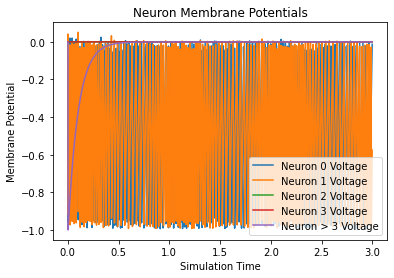

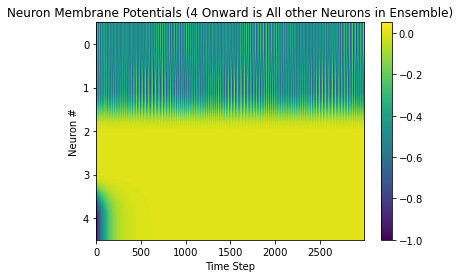

In [3]:
#plt.figure(figsize=(16,9))
plt.figure()
for i in range(4):
    plt.plot(sc_data['t'],sc_data['V'][i,:], label='Neuron %i Voltage'%i)
plt.plot(sc_data['t'],sc_data['V'][5,:], label= 'Neuron > %i Voltage'%i)
plt.legend()
plt.title("Neuron Membrane Potentials")
plt.xlabel("Simulation Time")
plt.ylabel('Membrane Potential')
plt.savefig('membrane_potential_plot.png',bbox_inches='tight')
plt.show()


#plt.figure(figsize=(16,9))
plt.figure()
plt.imshow(sc_data['V'][0:5,:])
plt.xlabel("Time Step")
plt.axis('auto')
plt.colorbar()
plt.title('Neuron Membrane Potentials (4 Onward is All other Neurons in Ensemble)')
plt.ylabel('Neuron #')
plt.savefig('membrane_potential_image.png',bbox_inches='tight')
plt.show()

In [4]:
def rmse(x,y): return np.sqrt(np.mean(np.square(x-y)))

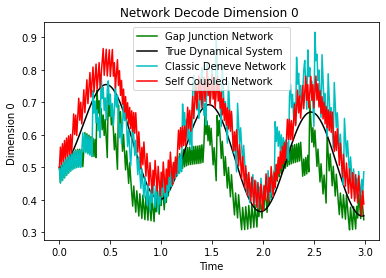

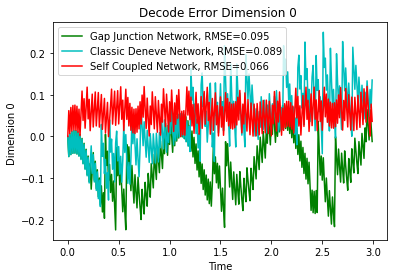

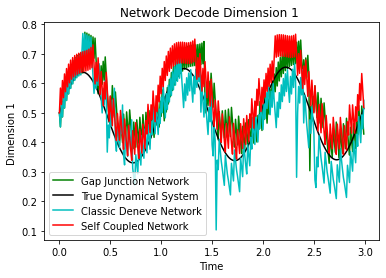

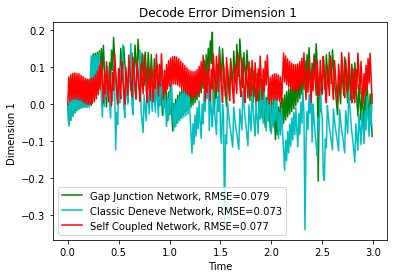

In [5]:
plot_step = 10

for i in range(gj_data['x_hat'].shape[0]):
    #plt.figure(figsize=(16,9))
    plt.figure()
    plt.xlabel('Time')
    plt.ylabel('Dimension %i '%i)
    plt.plot(gj_data['t'][0:-1:plot_step], gj_data['x_hat'][i,0:-1:plot_step],c='g',label='Gap Junction Network')
    plt.plot(gj_data['t'][0:-1:plot_step], gj_data['x_true'][i,0:-1:plot_step],c='k',label='True Dynamical System')
    plt.plot(classic_data['t'][0:-1:plot_step], classic_data['x_hat'][i,0:-1:plot_step],c='c',label='Classic Deneve Network')
    plt.plot(sc_data['t'][0:-1:plot_step], sc_data['x_hat'][i,0:-1:plot_step],c='r',label='Self Coupled Network')
    plt.title('Network Decode Dimension %i '%i)
    plt.legend()
    #plt.ylim([-1.1, 1.1])
    #plt.savefig('network_decode_dim_%i.png'%i,bbox_inches='tight')
    
    #plt.figure(figsize=(16,9))
    plt.figure()
    plt.xlabel('Time')
    plt.ylabel('Dimension %i '%i)
    
    gj_err = rmse(gj_data['x_hat'][i,0:-1:plot_step], gj_data['x_true'][i,0:-1:plot_step])
    classic_err = rmse(classic_data['x_hat'][i,0:-1:plot_step], classic_data['x_true'][i,0:-1:plot_step])
    sc_err = rmse(sc_data['x_hat'][i,0:-1:plot_step], sc_data['x_true'][i,0:-1:plot_step])
    
    plt.plot(gj_data['t'][0:-1:plot_step], gj_data['x_hat'][i,0:-1:plot_step] - gj_data['x_true'][i,0:-1:plot_step],c='g',label='Gap Junction Network, RMSE=%.3f'%gj_err)
    plt.plot(classic_data['t'][0:-1:plot_step], classic_data['x_hat'][i,0:-1:plot_step] - classic_data['x_true'][i,0:-1:plot_step],c='c',label='Classic Deneve Network, RMSE=%.3f'%classic_err)
    plt.plot(sc_data['t'][0:-1:plot_step], sc_data['x_hat'][i,0:-1:plot_step] - sc_data['x_true'][i,0:-1:plot_step],c='r',label='Self Coupled Network, RMSE=%.3f'%sc_err)
    plt.title('Decode Error Dimension %i '%i)
    plt.legend()
    #plt.ylim([-1.1, 1.1])
    #plt.savefig('decode_error_dim_%i.png'%i,bbox_inches='tight')
plt.show()


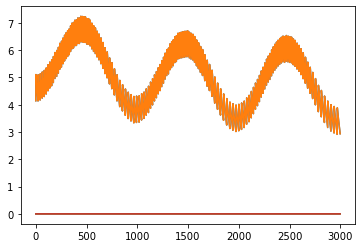

In [6]:
plt.plot(sc_data['r'][0,:])
plt.plot(sc_data['r'][0,:])
plt.plot(sc_data['r'][2,:])
plt.plot(sc_data['r'][3,:])